# Generate Pareto frontier plots

TODO: We could consider doing some preprocessing on the dataframes, so that if the next result is worse, we just keep the preceding result. 

## Imports

In [5]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

## m=2, exp2

### Load in source data

In [6]:
parent_dir = Path("/home/joefarrington/CDT/bloodbank_marl/bloodbank_marl/single_agent_replenishment/pareto_frontier_plots/outputs/2024-02-29/17-03-51")

heuristic_df = pd.read_csv(parent_dir / "heuristic_df.csv")
service_level_limit_df = pd.read_csv(parent_dir / "service_level_limit_df.csv")
wastage_limit_df = pd.read_csv(parent_dir / "wastage_limit_df.csv")

### Create figure

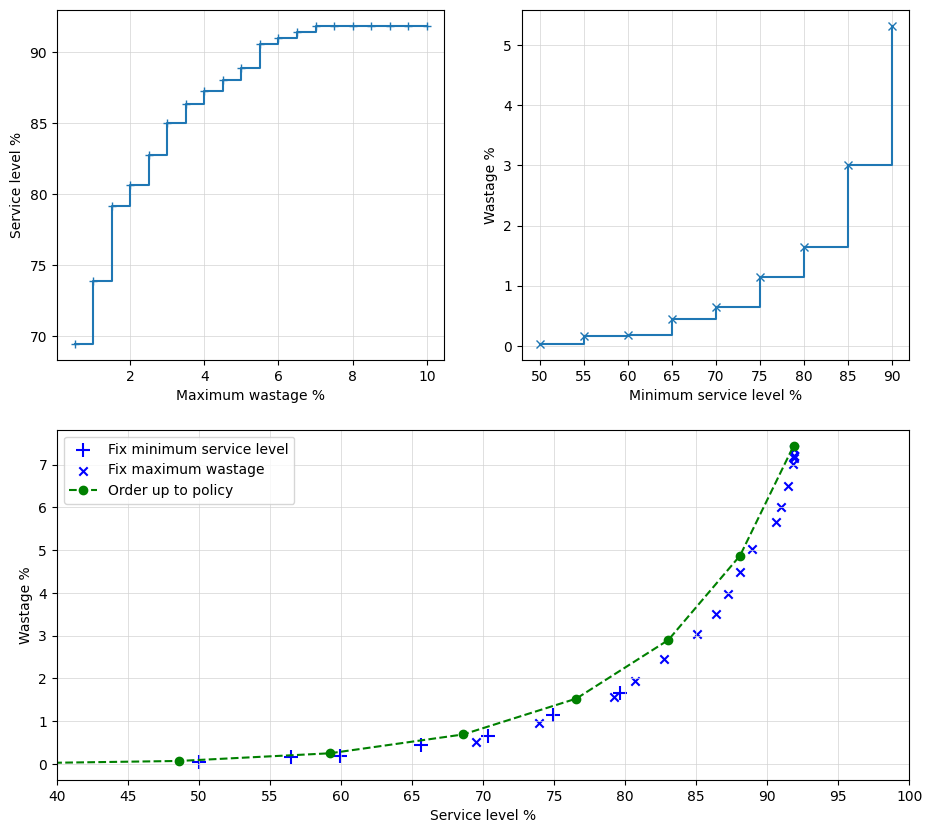

In [11]:
fig = plt.figure(figsize=(11, 10))
gs = GridSpec(2, 2, figure=fig)

# Exchange curve when fixing max wastage
ax1 = fig.add_subplot(gs[0,0])
ax1.step(wastage_limit_df["penalty_kpi_threshold"], wastage_limit_df["top_1_service_level_%_mean"], label="top_1", marker="+", where='post')
ax1.set_xlabel("Maximum wastage %")
ax1.set_ylabel("Service level %")
ax1.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')

# Exchange curve when fixing min service level
ax2 = fig.add_subplot(gs[0,1])
ax2.step(service_level_limit_df["penalty_kpi_threshold"], service_level_limit_df["top_1_wastage_%_mean"], label="top_1", marker="x", where='post')
ax2.set_xlabel("Minimum service level %")
ax2.set_ylabel("Wastage %")
ax2.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')

# Estimate Pareto frontier with NN, plotted against KPIs from heuristic policy
ax3 = fig.add_subplot(gs[1:,:])
ax3.scatter(service_level_limit_df["top_1_service_level_%_mean"][:-2], service_level_limit_df["top_1_wastage_%_mean"][:-2], label="Fix minimum service level", marker="+", s=95, color='blue')
ax3.scatter(wastage_limit_df["top_1_service_level_%_mean"], wastage_limit_df["top_1_wastage_%_mean"], label="Fix maximum wastage", marker="x", color='blue')
ax3.plot(heuristic_df["service_level_%_mean"], heuristic_df["wastage_%_mean"], label="Order up to policy", marker='o', linestyle='--', color='green')
ax3.set_xlabel("Service level %")
ax3.set_ylabel("Wastage %")
ax3.set_xlim(40,100)
ax3.set_xticks(np.arange(40, 105, 5))
ax3.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')
ax3.legend()